In [3]:
# Standard imports for computation physics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import typing
import scienceplots

# Pretty styling for graphs
plt.style.use(['science', 'grid', 'scatter', 'notebook'])
plt.rcParams["figure.figsize"] = (12, 8)

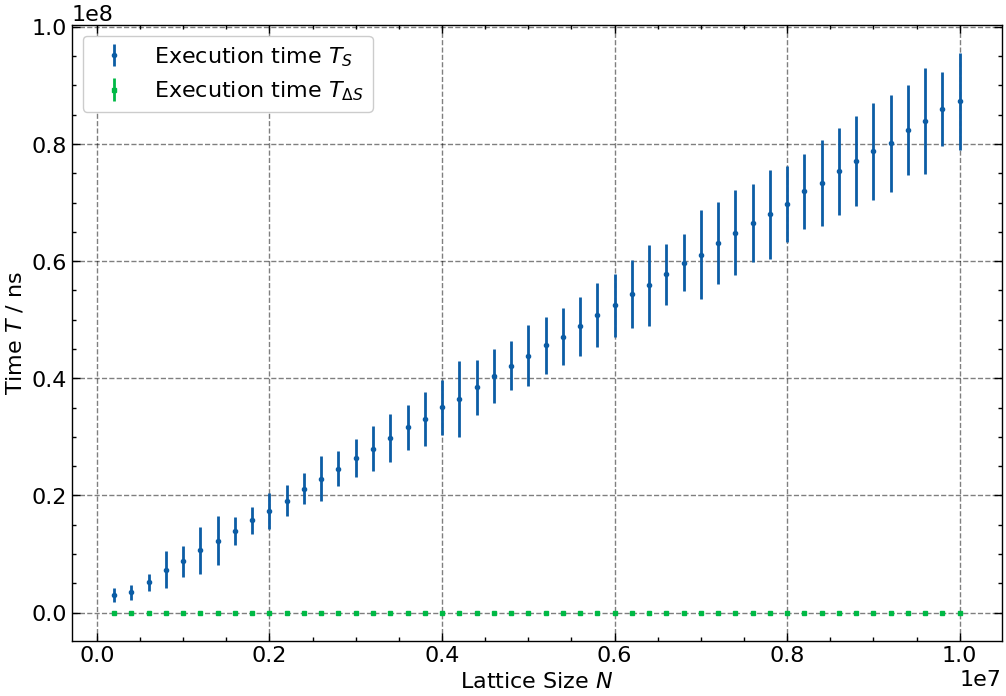

In [47]:
lattice_scaling_data = pd.read_csv('output/lattice_scaling.csv')
plt.errorbar(lattice_scaling_data['Lattice'], lattice_scaling_data['Action'], yerr=lattice_scaling_data['DeltaAction'], label='Execution time $T_S$')
plt.errorbar(lattice_scaling_data['Lattice'], lattice_scaling_data['DiffAction'], yerr=lattice_scaling_data['DeltaDiffAction'], label='Execution time $T_{\\Delta S}$')

plt.xlabel('Lattice Size $N$')
plt.ylabel('Time $T$ / ns')

plt.legend(loc='upper left')
